__contents:__
1. [Neurons: Weights and Activations](#Neurons)
   * 1.1. [Neuron Weights](#NeuronWeights)
   * 1.2. [Activation](#Activation)
   * 1.3. [Networks of Neurons](#NetworksofNeurons)
     - 1.3.1. [Input or Visible Layers](#Input)
     - 1.3.2. [Hidden Layers](#HiddenLayers)
     - 1.3.3. [Output Layers](#OutputLayers)
     - 1.3.4. [Training Networks](#TrainingNetworks)

# <h2 style="color: blue;"> 1.Neurons: Weights and Activations <a id='Neurons'></a></h2>

<font color='#808080'>

The building blocks for neural networks are artificial neurons. These are simple computational
units that have weighted input signals and produce an output signal using an activation
function.

<div style="text-align: center;">
    <img src="imgs/neuron.png" alt="neuronImg" width="400"/>
</div>

## <h2 style="color: blue;"> 1.1.Neuron Weights <a id='NeuronWeights'></a></h2>

<font color='#808080'>

Like linear regression, each neuron also has a bias which can be thought of as an input that always has the value $1.0$, and it, too, must be weighted.Weights are often initialized to small random values, such as values from $0$ to $0.3$, although more complex initialization schemes can be used.

## <h2 style="color: blue;"> 1.2.Activation <a id='Import_Library'></a></h2>

<font color='#808080'>

The weighted inputs are summed and passed through an activation function, sometimes called a transfer function. An activation function is a simple mapping of summed weighted input to the output of the neuron.

<div style="text-align: center;">
    <img src="imgs/AF.png" alt="AF" width = 400/>
</div>

* ```simple step```: activation functions were used When the summed input was __above__ a threshold of $0.5$, then the neuron would output a value of $1.0$; otherwise it would output a $0.0$.
* ```the logistic function```, also called the __sigmoid function__, were used to output a value between $0$ and $1$ with an __S-shaped__ distribution.
* ```The hyperbolic tangent function```, also called __tanh__, were used to output the same distribution over the range $−1$ to $+1$. 
* ```the rectifier activation function (ReLU)``` has been shown to provide better results.

## <h2 style="color: blue;"> 1.3.Networks of Neurons <a id='NetworksofNeurons'></a></h2>

<font color='#808080'>

Neurons are arranged into networks of neurons. A row of neurons is called a __layer__, and one network can have multiple layers. The architecture of the neurons in the network is often called the __network topology__.
<div style="text-align: center;">
    
  <img src="imgs/NetworksofNeuron.png" alt="Jupyter Logo" width="400">
  
</div>



### <h2 style="color: blue;"> 1.3.1.Input or Visible Layers <a id='Input'></a></h2>

<font color='#808080'>

The bottom layer that takes input from your dataset is called the visible layer because it is the
exposed part of the network.

### <h2 style="color: blue;"> 1.3.2.Hidden Layers <a id='HiddenLayers'></a></h2>

<font color='#808080'>

Layers after the input layer are called hidden layers because they are not directly exposed to
the input. The simplest network structure is to have a single neuron in the hidden layer that
directly outputs the value. Given increases in computing power and efficient libraries, very
deep neural networks can be constructed. __Deep learning__ can refer to having many hidden
layers in your neural network. They are deep because they would have been unimaginably
slow to train historically but may take seconds or minutes to train using modern techniques
and hardware.

### <h2 style="color: blue;"> 1.3.3.Output Layers <a id='OutputLayers'></a></h2>

<font color='#808080'>

The final hidden layer is called the __output layer__, and it is responsible for outputting a value or vector of values that correspond to the format required for the problem. The choice of
activation function in the output layer is strongly constrained by the type of problem that
you are modeling:

- ```A regression problem``` may have a __single__ output neuron, and the neuron may have __no activation function__.

- ```A binary classification problem``` may have a single output neuron and use a __sigmoid activation function__ to output a value between $0$ and $1$ to represent the probability of the primary class as predicted. This can be turned into a crisp class value by using a threshold of $0.5$ and snap values less than the threshold to $0$, otherwise to $1$.

- ```A multiclass classification problem``` may have multiple neurons in the output layer, one for each class (e.g., three neurons for the three classes in the famous iris flowers classification problem). In this case, a __softmax activation function__ may be used to output a probability of the network predicting each of the class values. Selecting the output with the highest probability can be used to produce a crisp classification value.

### <h2 style="color: blue;"> 1.3.4.Training Networks <a id='TrainingNetworks'></a></h2>

<font color='#808080'>
    
Once configured, the neural network needs to be trained on your dataset. The classical and still preferred training algorithm for neural networks is called __stochastic gradient descent__. This is where one row of data is exposed to the network at a time as input. The network processes the __input upward__, activating neurons as it goes to finally produce an output value. This is called _a forward pass on the network_. It is the type of pass that is also used after the network is trained in order to make predictions on new data.The output of the network is compared to the expected output, and an error is calculated. This error is then __propagated back__ through the network, one layer at a time, and the weights are updated according to the amount they contributed to the error. This clever bit of math is called the _backpropagation_ algorithm. The process is repeated for all of the examples in your training data. One round of updating the network for the entire training dataset is called an __epoch__. A network may be trained for tens, hundreds, or many thousands of epochs.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
X = [
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
]
y = [
    0,
    1,
    1,
    1
]
w = [
    random.random(),
    random.random(),
    -random.random()
]

LearningRate = 0.00025

In [3]:
def ActivationFunc(num):
    if num >= 0:
        return 1
    else:
        return 0

In [4]:
def Noron(x, y, w):
    step = 0
    for row in x:
        out = ActivationFunc(row[0] * w[0] + row[1] * w[1] + row[2] * w[2])
        #print(out)
        #print(y[step])
        error = y[step] - out
        #print(error)
        w[0] = w[0] + (error * LearningRate)
        w[1] = w[1] + (error * LearningRate)
        w[2] = w[2] + (error * LearningRate)
        #print(w)
        step += 1
    return w    

In [5]:
def OutPut(x,w):
    y_new = []
    for row in x:
        y_new.append(ActivationFunc(row[0] * w[0] + row[1] * w[1] + row[2] * w[2]))
    return y_new  

In [6]:
def AccErr(y, out):
    num = 0
    for i in range(len(y)):
        if y[i] == out[i]:
            num += 1
    acc = num / 4
    error = 1 - acc
    return acc, error

In [7]:
def PerceptronFunc(x, y, w):
    WEpoch = w
    ErrorEpoch = []
    AccuracyEpoch = []
    for i in range(200):
        WEpoch = Noron(x, y, WEpoch)
        y_new = OutPut(x, WEpoch)
        acc, err = AccErr(y, y_new)
        ErrorEpoch.append(err)
        AccuracyEpoch.append(acc)
    return ErrorEpoch, AccuracyEpoch   
        

In [8]:
ErrorEpoch, AccuracyEpoch = PerceptronFunc(X, y, w)

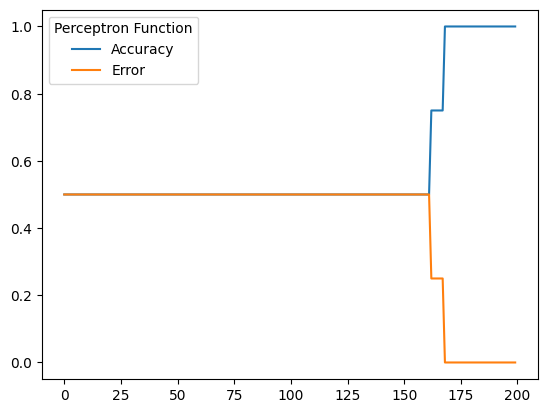

In [9]:
x = range(0,200)
plt.plot(x, AccuracyEpoch, label = "Accuracy")
plt.plot(x, ErrorEpoch, label = "Error")
plt.legend(title = "Perceptron Function")
plt.show()